In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('btc_data.csv')
df.head()

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [3]:
df_new=df.iloc[:,1:]

In [4]:
df_new.head(5)

,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,median_transaction_feeUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,0.0,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,0.0,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,0.0,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


### Dropping the priceUSD column and storing it in 'y'

In [5]:
df1=df_new.reset_index(drop=True)
n=df1.drop('priceUSD',1)


C:\Users\KIIT\AppData\Local\Temp\ipykernel_16196\646315669.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  n=df1.drop('priceUSD',1)


In [6]:
y=df1[['priceUSD']]
y

,priceUSD
0,0.0495
1,0.0726
2,0.0859
3,0.0783
4,0.0767
...,...
3483,9349.0000
3484,9394.0000
3485,9366.0000
3486,9393.0000


### Reading the StandardScaler PCA dataset

In [7]:
minmaxPCA=pd.read_csv('PCA_StandardScaler_data1.csv')
#Adding the y column to this dataset
combined_data=minmaxPCA.assign(priceUSD=y)
combined_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,99,100,101,102,103,104,105,106,107,priceUSD
0,0,-21.546803,21.888236,35.503365,5.660160,-26.331832,12.379384,-2.051919,-11.623255,14.491962,...,1.176430,-0.174391,-1.617762,4.851347,-0.986824,-1.731225,-1.716534,-0.851530,0.791756,0.0495
1,1,-20.467464,19.329678,32.364053,2.508690,-21.807530,17.990350,0.487409,-9.238707,13.658044,...,0.625548,-0.692582,-0.658485,2.364729,-0.955016,-0.220255,-0.306149,0.337637,1.535654,0.0726
2,2,-21.553040,20.989382,38.002623,1.092770,-26.068214,27.985134,-1.260956,-7.937606,9.079073,...,0.225689,-1.950618,0.347227,-1.770900,0.365888,3.035515,0.782899,2.358052,0.764571,0.0859
3,3,-20.476512,18.351236,31.250748,3.056882,-19.329919,21.239035,0.827941,-7.274807,1.728165,...,-3.666576,1.314088,5.391434,0.970074,-0.903477,1.504675,-0.058709,-0.969687,-1.832201,0.0783
4,4,-19.851448,17.305678,31.264870,-1.355544,-20.816337,17.743847,-5.031513,-5.767874,0.032634,...,-3.138488,1.986231,4.660604,0.186040,-1.609785,0.459965,0.276084,-0.073639,-1.280689,0.0767


### Dropping the first unnamed column

In [8]:
finaldata = combined_data.iloc[: , 1:]
finaldata

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,priceUSD
0,-21.546803,21.888236,35.503365,5.660160,-26.331832,12.379384,-2.051919,-11.623255,14.491962,6.973156,...,1.176430,-0.174391,-1.617762,4.851347,-0.986824,-1.731225,-1.716534,-0.851530,0.791756,0.0495
1,-20.467464,19.329678,32.364053,2.508690,-21.807530,17.990350,0.487409,-9.238707,13.658044,7.049672,...,0.625548,-0.692582,-0.658485,2.364729,-0.955016,-0.220255,-0.306149,0.337637,1.535654,0.0726
2,-21.553040,20.989382,38.002623,1.092770,-26.068214,27.985134,-1.260956,-7.937606,9.079073,7.710818,...,0.225689,-1.950618,0.347227,-1.770900,0.365888,3.035515,0.782899,2.358052,0.764571,0.0859
3,-20.476512,18.351236,31.250748,3.056882,-19.329919,21.239035,0.827941,-7.274807,1.728165,8.850672,...,-3.666576,1.314088,5.391434,0.970074,-0.903477,1.504675,-0.058709,-0.969687,-1.832201,0.0783
4,-19.851448,17.305678,31.264870,-1.355544,-20.816337,17.743847,-5.031513,-5.767874,0.032634,6.729982,...,-3.138488,1.986231,4.660604,0.186040,-1.609785,0.459965,0.276084,-0.073639,-1.280689,0.0767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,19.630066,-15.683449,12.690731,11.001457,5.864286,-0.502606,-4.160596,-5.122368,0.070994,-0.752235,...,-0.897364,-1.091820,0.215364,0.031164,1.604445,1.208215,1.185574,-0.164827,-0.875868,9349.0000
3484,20.276515,-16.158580,15.039984,10.943144,6.525591,-2.079491,-5.667626,-3.301163,1.249135,-1.241860,...,1.227446,0.641690,-0.004896,1.327845,-0.476281,0.262175,0.819836,-0.883276,0.580323,9394.0000
3485,19.438170,-15.359971,12.045600,11.126099,7.330382,2.191478,-3.713885,-2.973283,2.584260,-2.284411,...,-0.847139,1.112201,-0.247291,0.126362,-1.244953,0.926688,-1.728047,2.350574,-0.696599,9366.0000
3486,19.689729,-15.832295,14.363464,7.040175,5.504524,-0.254022,-7.509943,-3.425864,3.682001,0.000207,...,-0.583045,-0.234759,0.037219,-1.112261,-0.376768,1.382167,-1.502369,-0.047295,0.733646,9393.0000


In [9]:
X = finaldata.iloc[:, :-1].values
y = finaldata.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Linear Regression model on the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Printing R2 score

In [12]:
r_squared = regressor.score(X, y)
print(r_squared)

0.9952274075968183


In [13]:
y_pred = regressor.predict(X_test)

### Displaying adjusted R2

In [14]:
1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.995074865430632

### Accuracy on linear regression

In [15]:
regressor.score(X_train,y_train)
pred=regressor.predict(X_test)
regressor.score(X_test,y_test)

0.9916232851533238

### Defining model

### Training the Kernel SVM model on the Training set

In [16]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[1767 2058  985 ... 1049 2116 2661]
continuous
multiclass
multiclass


In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

### Applying grid search to find best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [19]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py", line 182, in fit
    y = self._validate_targets(y)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\svm\_base.py", line 735, in _validate_targets
    check_classification_targets(y)
  File "C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\utils\multiclass.py", line 200, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'


### Visualising the Training set results

### Visualising the Test set results

### Gradient boosting Model and its parameter

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [21]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [22]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, n_estimators=1500,
                          subsample=0.5)

 The best score across ALL searched params:
 0.9913707814410886

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.5}


### Training the Random forest regression model on the whole dataset

In [23]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

### Randomforest regressor using GridSearchCV 

In [24]:
from sklearn.metrics import r2_score
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor
    

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [25]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------")
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9859230425620891
Best Score: 0.9868133161796173
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20}
Loop:  1
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9857002314800685
Best Score: 0.9866767530590946
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}
Loop:  2
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.9858394429025614
Best Score: 0.9862398812546396
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}
Loop:  3
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.985591577402717
Best Score: 0.9870152856167385
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 30}
Loop:  4
--------------


C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\KIIT\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score: 0.98635504169019
Best Score: 0.9867381671499238
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 30}


### Building the model

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [12]:
classifier = Sequential()
classifier.add(Dense(units=735,kernel_initializer='he_normal',activation='relu'))
Dropout(0.2)
classifier.add(Dense(units=32,kernel_initializer='normal',activation='relu',kernel_regularizer = 'l1'))
Dropout(0.2)
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
classifier.add(Dense(units=8,kernel_initializer='normal',activation='relu'))
#Adding the output layer
classifier.add(Dense(1,kernel_initializer='normal',activation='linear'))

In [13]:
classifier.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])

In [14]:
model_history=classifier.fit(X_train,y_train,validation_split=0.2,batch_size=16,epochs=100)

Epoch 1/100
140/140 [==============================] - 1s 5ms/step - loss: 1965.0668 - mean_absolute_error: 1957.4308 - val_loss: 1200.8073 - val_mean_absolute_error: 1180.1183
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 390.8337 - mean_absolute_error: 367.2625 - val_loss: 203.6750 - val_mean_absolute_error: 179.4075
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 149.8680 - mean_absolute_error: 125.6887 - val_loss: 145.7970 - val_mean_absolute_error: 121.8610
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 125.0580 - mean_absolute_error: 101.2255 - val_loss: 137.0123 - val_mean_absolute_error: 113.1924
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 109.3572 - mean_absolute_error: 85.7191 - val_loss: 128.4426 - val_mean_absolute_error: 105.1214
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 101.4652 - mean_absolute_error: 78.1400 - val_loss: 116.5

140/140 [==============================] - 0s 3ms/step - loss: 48.1051 - mean_absolute_error: 32.5004 - val_loss: 91.6576 - val_mean_absolute_error: 75.9890
Epoch 50/100
140/140 [==============================] - 0s 3ms/step - loss: 52.0435 - mean_absolute_error: 36.6026 - val_loss: 82.3076 - val_mean_absolute_error: 67.0184
Epoch 51/100
140/140 [==============================] - 0s 3ms/step - loss: 46.4314 - mean_absolute_error: 31.1529 - val_loss: 78.0658 - val_mean_absolute_error: 62.7106
Epoch 52/100
140/140 [==============================] - 0s 3ms/step - loss: 46.8480 - mean_absolute_error: 31.6667 - val_loss: 74.1584 - val_mean_absolute_error: 59.0626
Epoch 53/100
140/140 [==============================] - 0s 3ms/step - loss: 46.9672 - mean_absolute_error: 31.8653 - val_loss: 74.4742 - val_mean_absolute_error: 59.3838
Epoch 54/100
140/140 [==============================] - 0s 3ms/step - loss: 46.0724 - mean_absolute_error: 31.0353 - val_loss: 81.0678 - val_mean_absolute_error: 6

140/140 [==============================] - 0s 3ms/step - loss: 37.7935 - mean_absolute_error: 26.0109 - val_loss: 68.7532 - val_mean_absolute_error: 56.9789
Epoch 98/100
140/140 [==============================] - 0s 3ms/step - loss: 43.3508 - mean_absolute_error: 31.5860 - val_loss: 65.1100 - val_mean_absolute_error: 53.3947
Epoch 99/100
140/140 [==============================] - 0s 3ms/step - loss: 41.2989 - mean_absolute_error: 29.5998 - val_loss: 87.1938 - val_mean_absolute_error: 75.6885
Epoch 100/100
140/140 [==============================] - 0s 3ms/step - loss: 44.9426 - mean_absolute_error: 33.3425 - val_loss: 66.7956 - val_mean_absolute_error: 55.1717


In [15]:
train_mse = classifier.evaluate(X_train, y_train, verbose=0)
test_mse = classifier.evaluate(X_test, y_test, verbose=0)

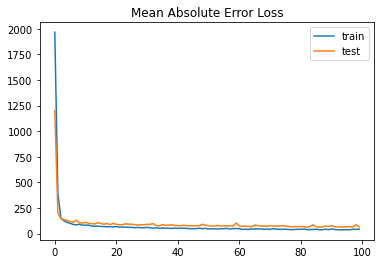

In [16]:
import matplotlib.pyplot as plt
plt.title('Mean Absolute Error Loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.legend()
plt.show()